In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
new_df = df.sample(30000)

In [10]:
new_df.head()

id    qid1    qid2  \
140553  140553  223340  223341   
346129  346129  450816  474489   
296986  296986  320238  419302   
330326  330326  407799  457074   
312931  312931  437457  437458   

                                                question1  \
140553        What are some of the Google Voice features?   
346129  What are the best websites to read well writte...   
296986  Why is Sri lanka and Bangladesh, so much clean...   
330326  What are the guest privileges with an LA Fitne...   
312931  How exactly is curve fitting and hypothesis te...   

                                                question2  is_duplicate  
140553                         What does Google Voice do?             1  
346129     What is the best blog to read website reviews?             0  
296986  Why the oldest civilization were only in India...             0  
330326         How do you get a membership at LA Fitness?             0  
312931  What does fitting a model in machine learning ...             0

In [11]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
new_df.duplicated().sum()

0

is_duplicate
0    18784
1    11216
Name: count, dtype: int64
is_duplicate
0    62.613333
1    37.386667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

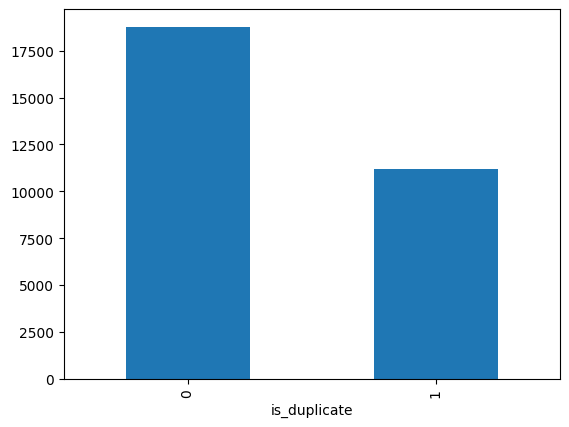

In [13]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55424
Number of questions getting repeated 3397


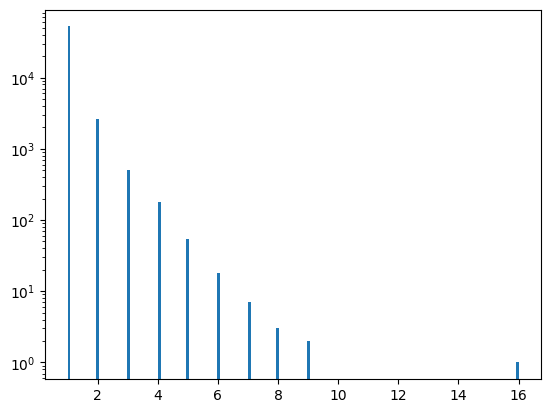

In [15]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [16]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [17]:
new_df.head()

id    qid1    qid2  \
140553  140553  223340  223341   
346129  346129  450816  474489   
296986  296986  320238  419302   
330326  330326  407799  457074   
312931  312931  437457  437458   

                                                question1  \
140553        What are some of the Google Voice features?   
346129  What are the best websites to read well writte...   
296986  Why is Sri lanka and Bangladesh, so much clean...   
330326  What are the guest privileges with an LA Fitne...   
312931  How exactly is curve fitting and hypothesis te...   

                                                question2  is_duplicate  \
140553                         What does Google Voice do?             1   
346129     What is the best blog to read website reviews?             0   
296986  Why the oldest civilization were only in India...             0   
330326         How do you get a membership at LA Fitness?             0   
312931  What does fitting a model in machine learning ...             0   

        q1_len  q2_len  
140553      43      26  
346129      57      46  
296986      60     141  
330326      60      42  
312931      77      51

In [18]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
140553  140553  223340  223341   
346129  346129  450816  474489   
296986  296986  320238  419302   
330326  330326  407799  457074   
312931  312931  437457  437458   

                                                question1  \
140553        What are some of the Google Voice features?   
346129  What are the best websites to read well writte...   
296986  Why is Sri lanka and Bangladesh, so much clean...   
330326  What are the guest privileges with an LA Fitne...   
312931  How exactly is curve fitting and hypothesis te...   

                                                question2  is_duplicate  \
140553                         What does Google Voice do?             1   
346129     What is the best blog to read website reviews?             0   
296986  Why the oldest civilization were only in India...             0   
330326         How do you get a membership at LA Fitness?             0   
312931  What does fitting a model in machine learning ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
140553      43      26             8             5  
346129      57      46            10             9  
296986      60     141            11            19  
330326      60      42            10             9  
312931      77      51            12             9

In [19]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [20]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
140553  140553  223340  223341   
346129  346129  450816  474489   
296986  296986  320238  419302   
330326  330326  407799  457074   
312931  312931  437457  437458   

                                                question1  \
140553        What are some of the Google Voice features?   
346129  What are the best websites to read well writte...   
296986  Why is Sri lanka and Bangladesh, so much clean...   
330326  What are the guest privileges with an LA Fitne...   
312931  How exactly is curve fitting and hypothesis te...   

                                                question2  is_duplicate  \
140553                         What does Google Voice do?             1   
346129     What is the best blog to read website reviews?             0   
296986  Why the oldest civilization were only in India...             0   
330326         How do you get a membership at LA Fitness?             0   
312931  What does fitting a model in machine learning ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
140553      43      26             8             5            3  
346129      57      46            10             9            5  
296986      60     141            11            19            4  
330326      60      42            10             9            1  
312931      77      51            12             9            3

In [21]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [22]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
140553  140553  223340  223341   
346129  346129  450816  474489   
296986  296986  320238  419302   
330326  330326  407799  457074   
312931  312931  437457  437458   

                                                question1  \
140553        What are some of the Google Voice features?   
346129  What are the best websites to read well writte...   
296986  Why is Sri lanka and Bangladesh, so much clean...   
330326  What are the guest privileges with an LA Fitne...   
312931  How exactly is curve fitting and hypothesis te...   

                                                question2  is_duplicate  \
140553                         What does Google Voice do?             1   
346129     What is the best blog to read website reviews?             0   
296986  Why the oldest civilization were only in India...             0   
330326         How do you get a membership at LA Fitness?             0   
312931  What does fitting a model in machine learning ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
140553      43      26             8             5            3          13  
346129      57      46            10             9            5          19  
296986      60     141            11            19            4          30  
330326      60      42            10             9            1          19  
312931      77      51            12             9            3          21

In [23]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
140553  140553  223340  223341   
346129  346129  450816  474489   
296986  296986  320238  419302   
330326  330326  407799  457074   
312931  312931  437457  437458   

                                                question1  \
140553        What are some of the Google Voice features?   
346129  What are the best websites to read well writte...   
296986  Why is Sri lanka and Bangladesh, so much clean...   
330326  What are the guest privileges with an LA Fitne...   
312931  How exactly is curve fitting and hypothesis te...   

                                                question2  is_duplicate  \
140553                         What does Google Voice do?             1   
346129     What is the best blog to read website reviews?             0   
296986  Why the oldest civilization were only in India...             0   
330326         How do you get a membership at LA Fitness?             0   
312931  What does fitting a model in machine learning ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
140553      43      26             8             5            3          13   
346129      57      46            10             9            5          19   
296986      60     141            11            19            4          30   
330326      60      42            10             9            1          19   
312931      77      51            12             9            3          21   

        word_share  
140553        0.23  
346129        0.26  
296986        0.13  
330326        0.05  
312931        0.14

minimum characters 4
maximum characters 413
average num of characters 59


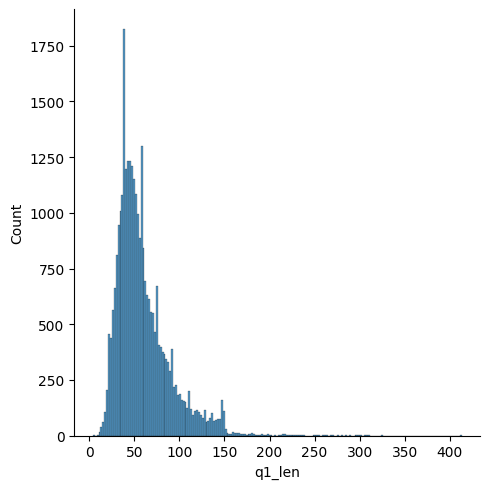

In [24]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 1151
average num of characters 60


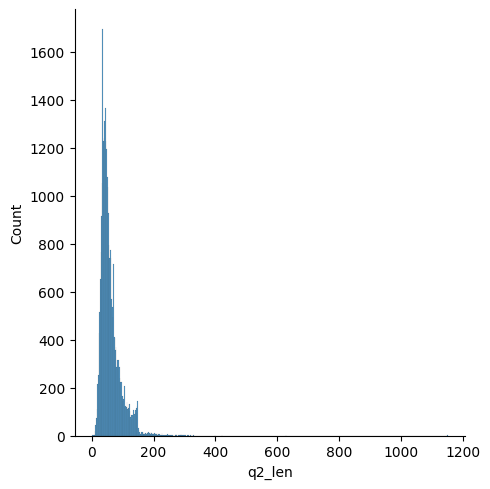

In [25]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 79
average num of words 10


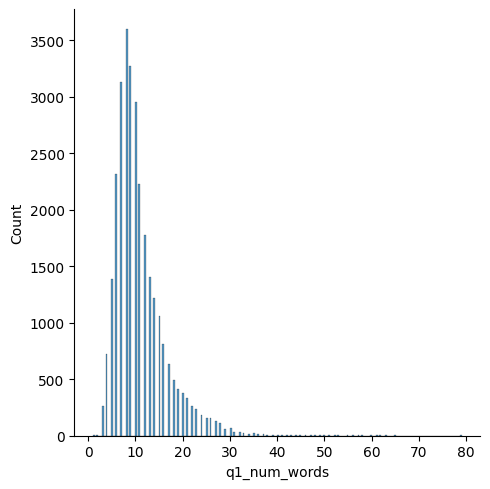

In [26]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


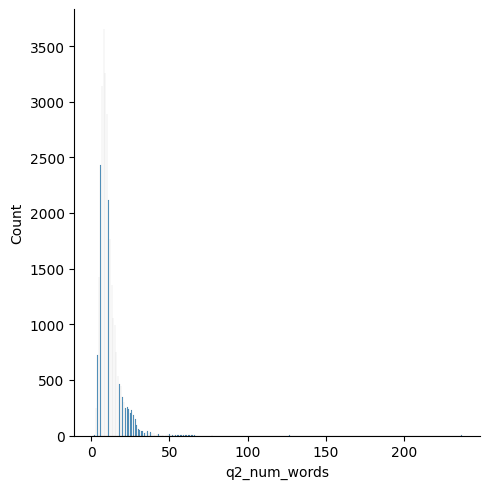

In [27]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

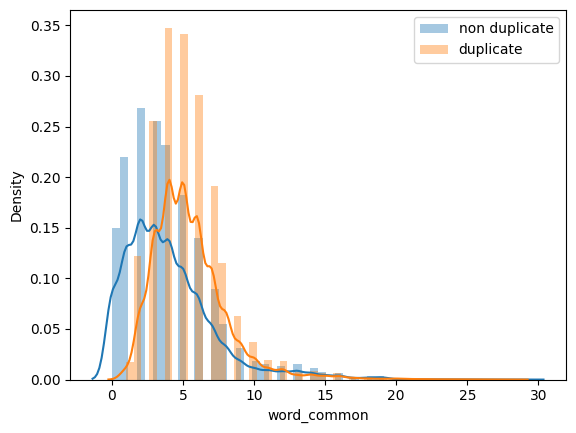

In [28]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

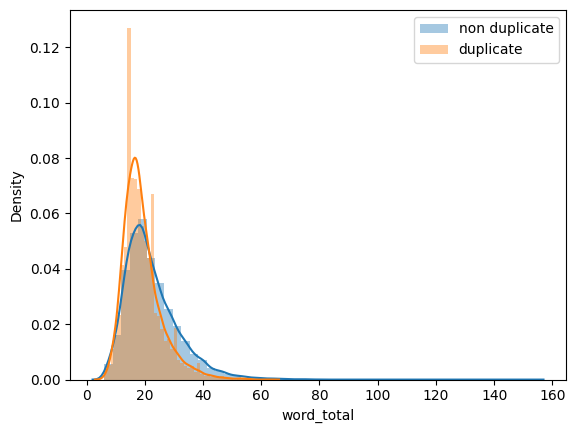

In [29]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

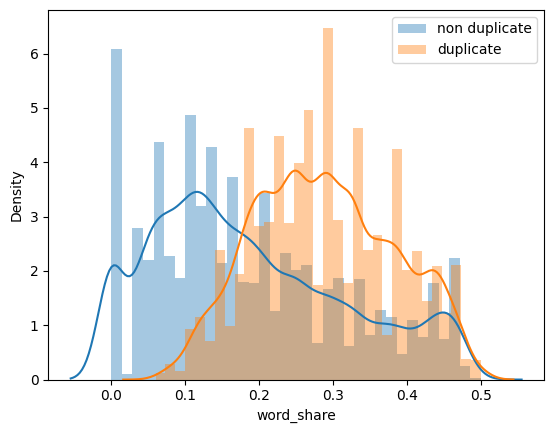

In [30]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [32]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
140553             1      43      26             8             5            3   
346129             0      57      46            10             9            5   
296986             0      60     141            11            19            4   
330326             0      60      42            10             9            1   
312931             0      77      51            12             9            3   

        word_total  word_share  
140553          13        0.23  
346129          19        0.26  
296986          30        0.13  
330326          19        0.05  
312931          21        0.14

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [35]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
140553             1      43      26             8             5            3   
346129             0      57      46            10             9            5   
296986             0      60     141            11            19            4   
330326             0      60      42            10             9            1   
312931             0      77      51            12             9            3   

        word_total  word_share  0  1  ...  2990  2991  2992  2993  2994  2995  \
140553          13        0.23  0  0  ...     0     0     0     0     0     0   
346129          19        0.26  0  0  ...     0     0     0     0     0     0   
296986          30        0.13  0  0  ...     0     0     0     0     0     0   
330326          19        0.05  0  0  ...     0     0     1     0     0     0   
312931          21        0.14  0  0  ...     0     0     0     0     0     0   

        2996  2997  2998  2999  
140553     0     0     0     0  
346129     0     0     0     0  
296986     0     0     0     0  
330326     0     0     0     0  
312931     0     0     0     0  

[5 rows x 6008 columns]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7618333333333334

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7638333333333334